In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import time

Below the function for sampling from gaussian distribution, calculating random roacle, doing the step in each iteration, and the whole algorithm are defined.

In [2]:
def sample_gaussian_distribution(d):
    v = np.random.normal(0,1, size=d) 
    return v
def grad(func,x,y,u1,u2,mu=0.05,xy = 'x'):
    perturbation1 = mu*u1
    perturbation2 = mu*u2
    g = (func(x+perturbation1,y+perturbation2)-func(x,y))/mu
    if xy == 'x':
        return g*u1
    if xy == 'y':
        return g*u2

def step_x(func,xs,ys,x,y,u1,u2,h,mu=0.05):
    grd = grad(func,x,y,u1,u2,mu,xy='x')
    xx = xs - h*grd
    return xx
def step_y(func,xs,ys,x,y,u1,u2,h,mu=0.05):
    grd = grad(func,x,y,u1,u2,mu,xy='y')
    yy = ys + h*grd
    return yy

def ZOEG(func,x0,y0,N,h_1 = 0.001,h_2=0.001,mu=0.05,flag2 = 'not_c',projx = None, projy = None):
    dim1 = len(x0)
    dim2 = len(y0)
    x=np.zeros((dim1,N+1))
    x[:,0]=x0
    y=np.zeros((dim2,N+1))
    y[:,0]=y0
    if flag2 == 'not_c':
        for k in range(N):
            u1 = sample_gaussian_distribution(len(x0))
            u2 = sample_gaussian_distribution(len(y0))
            xh = step_x(func,x[:,k],y[:,k],x[:,k],y[:,k],u1,u2,h_1,mu)
            yh = step_y(func,x[:,k],y[:,k],x[:,k],y[:,k],u1,u2,h_1,mu)
            u1 = sample_gaussian_distribution(len(x0))
            u2 = sample_gaussian_distribution(len(y0))
            x[:,k+1] = step_x(func,x[:,k],y[:,k],xh,yh,u1,u2,h_2,mu)
            y[:,k+1] = step_y(func,x[:,k],y[:,k],xh,yh,u1,u2,h_2,mu)
    if flag2 == 'c':
        for k in range(N):
            u1 = sample_gaussian_distribution(len(x))
            u2 = sample_gaussian_distribution(len(y))
            xh = projx(step_x(func,x[:,k],y[:,k],x[:,k],y[:,k],u1,u2,h_1,mu))
            yh = projy(step_y(func,x[:,k],y[:,k],x[:,k],y[:,k],u1,u2,h_1,mu))
            u1 = sample_gaussian_distribution(len(x))
            u2 = sample_gaussian_distribution(len(y))
            x[:,k+1] = projx(step_x(func,x[:,k],y[:,k],xh,yh,u1,u2,h_2,mu))
            y[:,k+1] = projy(step_y(func,x[:,k],y[:,k],xh,yh,u1,u2,h_2,mu))
    return x,y

Below is the code for the toy problems

In [3]:
def f(x,y):
    return np.sum(np.abs(x**3-1)-np.abs(y**3+1))
# x0 = np.array([5, -7])
# y0 = np.array([-7, 5])
x0 = np.array([7, 1])
y0 = np.array([-1, 7])
x,y = ZOEG(f,x0,y0,15000,h_1 = 1e-3,h_2 = 1e-3,mu=1e-6)
print("final X and Y with g",x[:,-1],y[:,-1])

final X and Y with g [1.01705724 1.00608574] [-0.99291121 -0.09387693]


$F_3(x,y)$

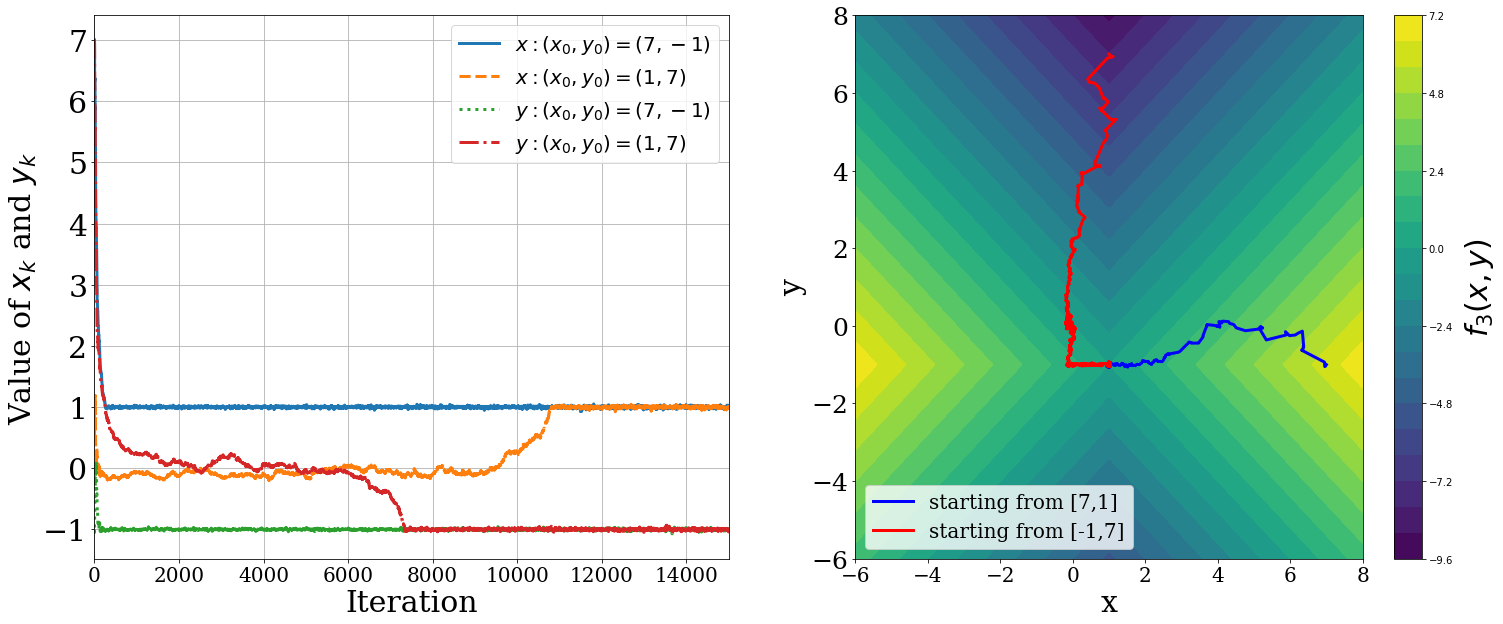

In [34]:
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
t = np.array(range(15001))
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=30, color='black')
plt.plot(t,x[0,:],'-',linewidth=3.0)
plt.plot(t,x[1,:],'--',linewidth=3.0)
plt.plot(t,y[0,:],':',linewidth=3.0)
plt.grid('on')
plt.plot(t,y[1,:],'-.',linewidth=3.0)
plt.xlim(0,15001)
plt.xlabel('Iteration', fontdict=font)
plt.ylabel('Value of $x_k$ and $y_k$', fontdict=font)
plt.legend(['$x:(x_0,y_0)=(7,-1)$','$x:(x_0,y_0)=(1,7)$','$y:(x_0,y_0)=(7,-1)$','$y:(x_0,y_0)=(1,7)$'],loc='best', prop=font1)

def f(x, y):
    return np.abs(x-1)-np.abs(y+1)

x_values = np.linspace(-6, 8, 200)
y_values = np.linspace(-6, 8, 200)
X, Y = np.meshgrid(x_values, y_values)
Z = f(X, Y)

plt.subplot(1, 2, 2)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')
heatmap = plt.contourf(X, Y, Z, cmap='viridis', levels=20)
colorbar = plt.colorbar(heatmap)
colorbar.set_label('$f_3(x, y)$', labelpad=10, fontproperties=font)

x_array = x[0, :]
y_array = y[0, :]

x_array2 = x[1, :]
y_array2 = y[1, :]

curve_points = np.column_stack((x_array, y_array))
curve_point2 = np.column_stack((x_array2, y_array2))

plt.plot(curve_points[:, 0], curve_points[:, 1], color='blue', linestyle='-', linewidth=3, label='starting from [7,1]')
plt.plot(curve_point2[:, 0], curve_point2[:, 1], color='red', linestyle='-', linewidth=3, label='starting from [-1,7]')


plt.xlabel('x', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.legend(loc='best', prop=font1)
plt.savefig('Pics/F_3.pdf', format='pdf',bbox_inches='tight')
plt.show()


$F_2(x,y)$

In [4]:
def euclidean_projectiony(x):

    x = np.clip(x, -2, 2)
    return x

def euclidean_projectionx(x):

    x = np.clip(x, -3, 3)
    return x

In [22]:
def f(x,y):
    return np.sum(np.log(1+np.exp(x))+3*x*y-np.log(1+np.exp(y)))
x0 = np.array([5, -7])
y0 = np.array([-7, 5])
x,y = ZOEG(f,x0,y0,20000,h_1 = 1e-3,h_2 = 1e-3,mu=1e-6,flag2='c',projx=euclidean_projectionx,projy=euclidean_projectiony)
print("final X and Y with g",x[:,-1],y[:,-1])

final X and Y with g [0.13949842 0.15860822] [-0.17618009 -0.18754003]


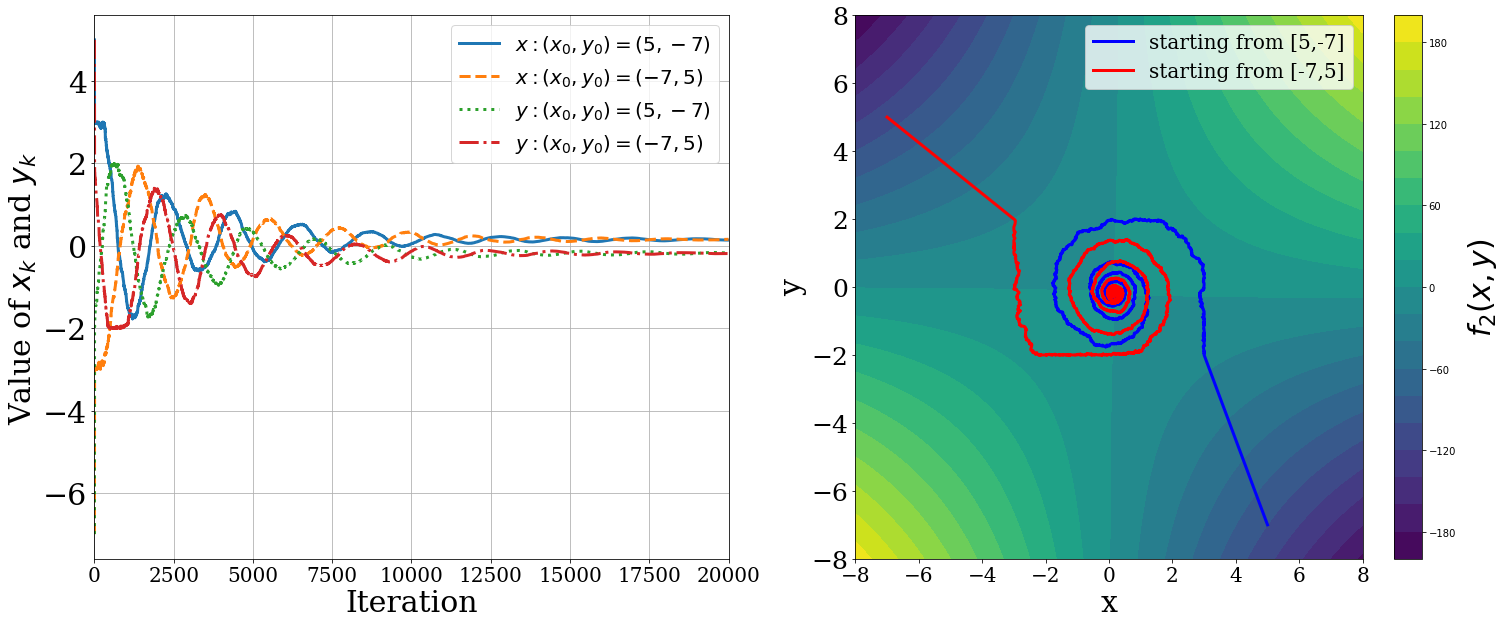

In [23]:
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
t = np.array(range(20001))
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=30, color='black')
plt.plot(t,x[0,:],'-',linewidth=3.0)
plt.plot(t,x[1,:],'--',linewidth=3.0)
plt.plot(t,y[0,:],':',linewidth=3.0)
plt.plot(t,y[1,:],'-.',linewidth=3.0)
plt.xlim(0,20001)
plt.grid('on')
plt.xlabel('Iteration', fontdict=font)
plt.ylabel('Value of $x_k$ and $y_k$', fontdict=font)
plt.legend(['$x:(x_0,y_0)=(5,-7)$','$x:(x_0,y_0)=(-7,5)$','$y:(x_0,y_0)=(5,-7)$','$y:(x_0,y_0)=(-7,5)$'],loc='best', prop=font1)

def f(x, y):
    return np.log(1+np.exp(x))+3*x*y-np.log(1+np.exp(y))

x_values = np.linspace(-8, 8, 200)
y_values = np.linspace(-8, 8, 200)
X, Y = np.meshgrid(x_values, y_values)
Z = f(X, Y)

plt.subplot(1, 2, 2)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')
heatmap = plt.contourf(X, Y, Z, cmap='viridis', levels=20)
colorbar = plt.colorbar(heatmap)
colorbar.set_label('$f_2(x, y)$', labelpad=10, fontproperties=font)

x_array = x[0, :]
y_array = y[0, :]

x_array2 = x[1, :]
y_array2 = y[1, :]

curve_points = np.column_stack((x_array, y_array))
curve_point2 = np.column_stack((x_array2, y_array2))

plt.plot(curve_points[:, 0], curve_points[:, 1], color='blue', linestyle='-', linewidth=3, label='starting from [5,-7]')
plt.plot(curve_point2[:, 0], curve_point2[:, 1], color='red', linestyle='-', linewidth=3, label='starting from [-7,5]')


plt.xlabel('x', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.legend(loc='best', prop=font1)
plt.savefig('Pics/F_2.pdf', format='pdf',bbox_inches='tight')
plt.show()


$F_1(x,y)$

In [20]:
def f(x,y):
    return np.sum(2*x**2-2*y**2+4*x*y+10*np.sin(x*y))
x0 = np.array([5, -7])
y0 = np.array([-7, 5])
x,y = ZOEG(f,x0,y0,1700,h_1 = 1e-3,h_2 = 1e-3,mu=1e-6)
print("final X and Y with g",x[:,-1],y[:,-1])

final X and Y with g [-0.01581401  0.01141458] [-0.00616115  0.00302997]


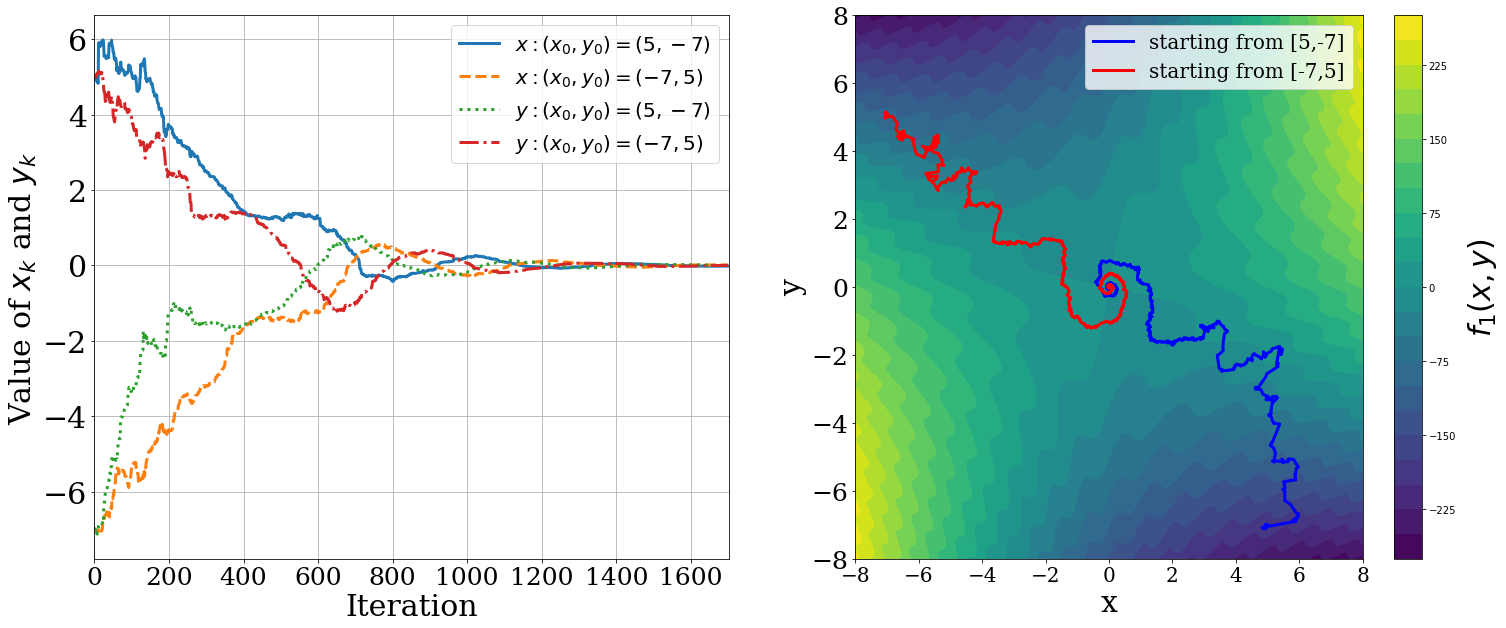

In [21]:
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
t = np.array(range(1701))
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.xticks(fontname='serif', fontsize=25, color='black')
plt.yticks(fontname='serif', fontsize=30, color='black')
plt.plot(t,x[0,:],'-',linewidth=3.0)
plt.plot(t,x[1,:],'--',linewidth=3.0)
plt.plot(t,y[0,:],':',linewidth=3.0)
plt.plot(t,y[1,:],'-.',linewidth=3.0)
plt.grid('on')
plt.xlim(0,1701)
plt.xlabel('Iteration', fontdict=font)
plt.ylabel('Value of $x_k$ and $y_k$', fontdict=font)
plt.legend(['$x:(x_0,y_0)=(5,-7)$','$x:(x_0,y_0)=(-7,5)$','$y:(x_0,y_0)=(5,-7)$','$y:(x_0,y_0)=(-7,5)$'],loc='best', prop=font1)

def f(x, y):
    return 2*x**2-2*y**2+4*x*y+6*np.sin(x*y)

x_values = np.linspace(-8, 8, 200)
y_values = np.linspace(-8, 8, 200)
X, Y = np.meshgrid(x_values, y_values)
Z = f(X, Y)

plt.subplot(1, 2, 2)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')
heatmap = plt.contourf(X, Y, Z, cmap='viridis', levels=20)
colorbar = plt.colorbar(heatmap)
colorbar.set_label('$f_1(x, y)$', labelpad=10, fontproperties=font)

x_array = x[0, :]
y_array = y[0, :]

x_array2 = x[1, :]
y_array2 = y[1, :]

curve_points = np.column_stack((x_array, y_array))
curve_point2 = np.column_stack((x_array2, y_array2))

plt.plot(curve_points[:, 0], curve_points[:, 1], color='blue', linestyle='-', linewidth=3, label='starting from [5,-7]')
plt.plot(curve_point2[:, 0], curve_point2[:, 1], color='red', linestyle='-', linewidth=3, label='starting from [-7,5]')


plt.xlabel('x', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.legend(loc='best', prop=font1)
plt.savefig('Pics/F_1.pdf', format='pdf',bbox_inches='tight')
plt.show()


Below is the code for Robust Least Square problem. The codes for RMM and GDA are here and the code for DS problem is in DR_Low.ipynb file and the results of that code is loaded here.

In [24]:
def euclidean_projectiony(x, max_norm=5):
    norm_x = np.linalg.norm(x)
    if norm_x > max_norm:
        x = x * (max_norm / norm_x)
    return x

def euclidean_projectionx(point):
    return(point)

ZOEG

In [39]:
etime = []
fvalues = []
for j in range(10):
    start = time.time()
    n = 150
    m = 250
    num_iterations = 10000

    # Generate A, x*, and y0
    A = np.random.randn(n, m)
    x_star = np.random.randn(m)
    epsilon = 0.001 * np.random.randn(n)
    y0 = A@x_star + epsilon
    x_initial = np.random.randn(m)
    y_initial = np.random.randn(n)
    def F(x, y):
        return np.linalg.norm(A@x-y0+y)**2

    dim1 = len(x_initial)
    dim2 = len(y_initial)
    xt=np.zeros((dim1,num_iterations+1))
    xt[:,0]=x_initial
    yt=np.zeros((dim2,num_iterations+1))
    yt[:,0]=y_initial
    h_1 = 1e-5
    h_2 = 1e-5
    mu = 1e-9
    flag = 'noth'
    function_values = []
    F_0 = F(xt[:,0], yt[:,0])
    function_values.append(F_0)
    for k in range(num_iterations):
        u1 = sample_gaussian_distribution(len(x_initial))
        u2 = sample_gaussian_distribution(len(y_initial))
        xh = euclidean_projectionx(step_x(F,xt[:,k],yt[:,k],xt[:,k],yt[:,k],u1,u2,h_1,mu))
        yh = euclidean_projectiony(step_y(F,xt[:,k],yt[:,k],xt[:,k],yt[:,k],u1,u2,h_1,mu))
        u1 = sample_gaussian_distribution(len(x_initial))
        u2 = sample_gaussian_distribution(len(y_initial))
        xt[:,k+1] = euclidean_projectionx(step_x(F,xt[:,k],yt[:,k],xh,yh,u1,u2,h_2,mu))
        yt[:,k+1] = euclidean_projectiony(step_y(F,xt[:,k],yt[:,k],xh,yh,u1,u2,h_2,mu))
        function_value = F(xt[:,k+1], yt[:,k+1])
        function_values.append(function_value)
        if function_value <=0.005*F_0:
            end = time.time()
            execution_time = end-start
            etime.append(execution_time)
            fvalues.append(function_values)
            break
        if k == num_iterations-1:
            end = time.time()
            execution_time = end-start
            etime.append(execution_time)
            fvalues.append(function_values)

GDA

In [47]:
etime2 = []
fvalues2 = []
for j in range(10):
    start = time.time()
    n = 150
    m = 250
    num_iterations = 10000

    # Generate A, x*, and y0
    A = np.random.randn(n, m)
    x_star = np.random.randn(m)
    epsilon = 0.001 * np.random.randn(n)
    y0 = A@x_star + epsilon
    x_initial = np.random.randn(m)
    y_initial = np.random.randn(n)
    def F(x, y):
        return np.linalg.norm(A@x-y0+y)**2

    dim1 = len(x_initial)
    dim2 = len(y_initial)
    xt=np.zeros((dim1,num_iterations+1))
    xt[:,0]=x_initial
    yt=np.zeros((dim2,num_iterations+1))
    yt[:,0]=y_initial
    h_x = 1e-5
    h_y = 1e-5
    mu = 1e-9
    flag = 'noth'
    function_values = []
    F_0 = F(xt[:,0], yt[:,0])
    function_values.append(F_0)
    for k in range(num_iterations):
        y_grad =  -2*(A @ xt[:,k] - y0 + yt[:,k])
        yt[:,k+1] = euclidean_projectiony(yt[:,k] + h_y * y_grad)
        x_grad = 2 * A.T @ (A @ xt[:,k] - y0 + yt[:,k])
        xt[:,k+1] = xt[:,k] - h_x * x_grad
        function_value = F(xt[:,k+1], yt[:,k+1])
        function_values.append(function_value)
        if function_value <=0.005*F_0:
            end = time.time()
            execution_time = end-start
            etime2.append(execution_time)
            fvalues2.append(function_values)
            break
        if k == num_iterations-1:
            end = time.time()
            execution_time = end-start
            etime2.append(execution_time)
            fvalues2.append(function_values)

In [48]:
import json
with open('fvalues2.json', 'w') as file:
    json.dump(fvalues2, file)
with open('etime2.json', 'w') as file:
    json.dump(etime2, file)
with open('fvalues.json', 'w') as file:
    json.dump(fvalues, file)
with open('etime.json', 'w') as file:
    json.dump(etime, file)

In [50]:
import json
with open('fvalues3.json', 'r') as file:
    fvalues3 = json.load(file)
with open('etime3.json', 'r') as file:
    etime3 = json.load(file)
with open('fvalues2.json', 'r') as file:
    fvalues2 = json.load(file)
with open('etime2.json', 'r') as file:
    etime2 = json.load(file)
with open('fvalues.json', 'r') as file:
    fvalues = json.load(file)
with open('etime.json', 'r') as file:
    etime = json.load(file)
with open('f_callstotal_RLS.json', 'r') as file:
    f_callstotal_RLS = json.load(file)

In [51]:
etime_avg = np.mean(np.array(etime))
etime_avg2 = np.mean(np.array(etime2))
etime_avg3 = np.mean(np.array(etime3))
print(etime_avg,etime_avg2,etime_avg3)
etime_std = np.std(np.array(etime))
etime_std2 = np.std(np.array(etime2))
etime_std3 = np.std(np.array(etime3))
print(etime_std,etime_std2,etime_std3)

0.3900314807891846 0.21052219867706298 24.56333284378052
0.1322664101484524 0.04047363053479013 3.7973595169344305


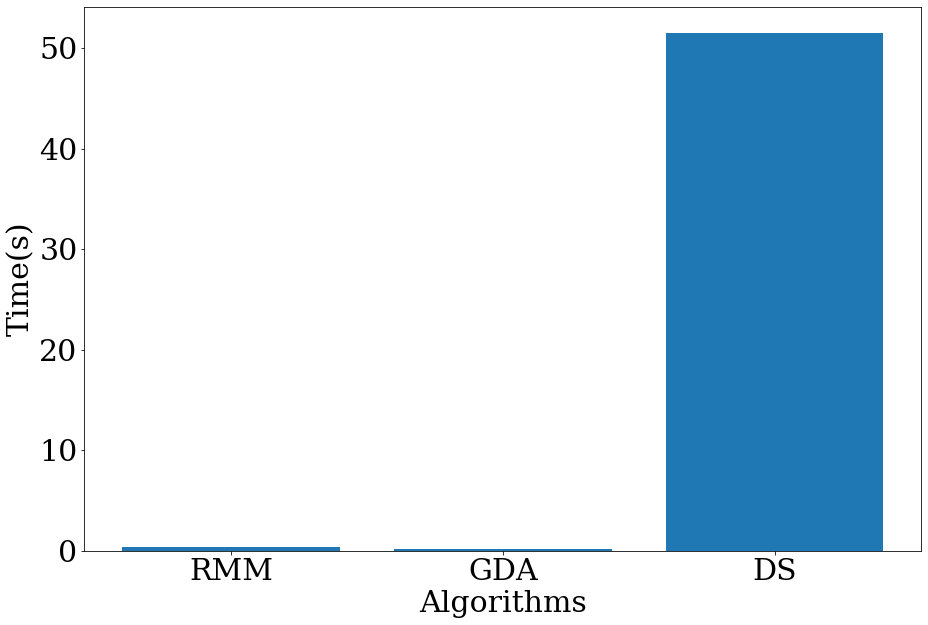

In [5]:
categories = ['RMM', 'GDA', 'DS']
values = [etime_avg, etime_avg2, etime_avg3]
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.figure(figsize=(15,10))
plt.xticks(fontname='serif', fontsize=30, color='black')
plt.yticks(fontname='serif', fontsize=30, color='black')
plt.bar(categories, values)

plt.xlabel('Algorithms',fontdict=font)
plt.ylabel('Time(s)',fontdict=font)
plt.savefig('Pics/RLS_time.pdf', format='pdf',bbox_inches='tight')
plt.show()

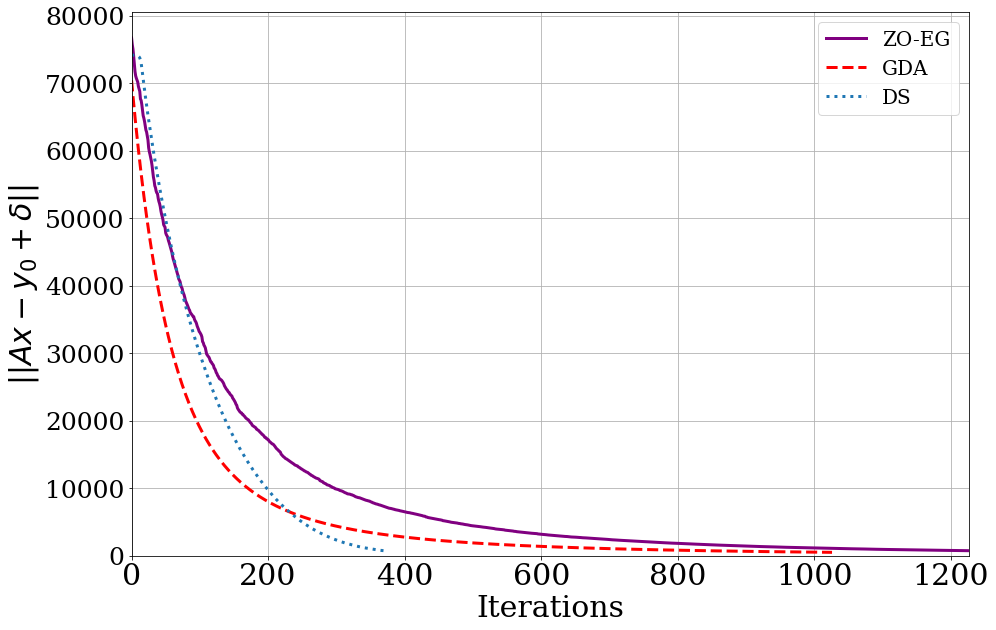

In [52]:
min_length1 = min(len(item) for item in fvalues)
fvalues_avg = np.mean(np.array([item[:min_length1] for item in fvalues]),axis=0)
min_length = min(len(item) for item in fvalues2)
fvalues2_avg = np.mean(np.array([item[:min_length] for item in fvalues2]),axis=0)
min_length = min(len(item) for item in fvalues3)
fvalues3_avg = np.mean(np.array([item[:min_length] for item in fvalues3]),axis=0)

font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.figure(figsize=(15,10))

plt.xticks(fontname='serif', fontsize=30, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')
plt.plot(np.array(range(len(fvalues_avg))), fvalues_avg, '-',label='ZO-EG', color = 'purple',linewidth=3)
plt.plot(np.array(range(len(fvalues2_avg))), fvalues2_avg,'--', label='GDA',color = 'red',linewidth=3)
plt.plot(np.array(range(len(fvalues3_avg))), fvalues3_avg,':', label='DS',linewidth=3)
plt.xlim(0,min_length1)
plt.ylim(0)
plt.grid('on')
plt.xlabel('Iterations',fontdict=font)
plt.ylabel('$\||Ax-y_0+\delta\||$',fontdict=font)
plt.legend(loc='best', prop=font1)
plt.savefig('Pics/RLS.pdf', format='pdf',bbox_inches='tight')

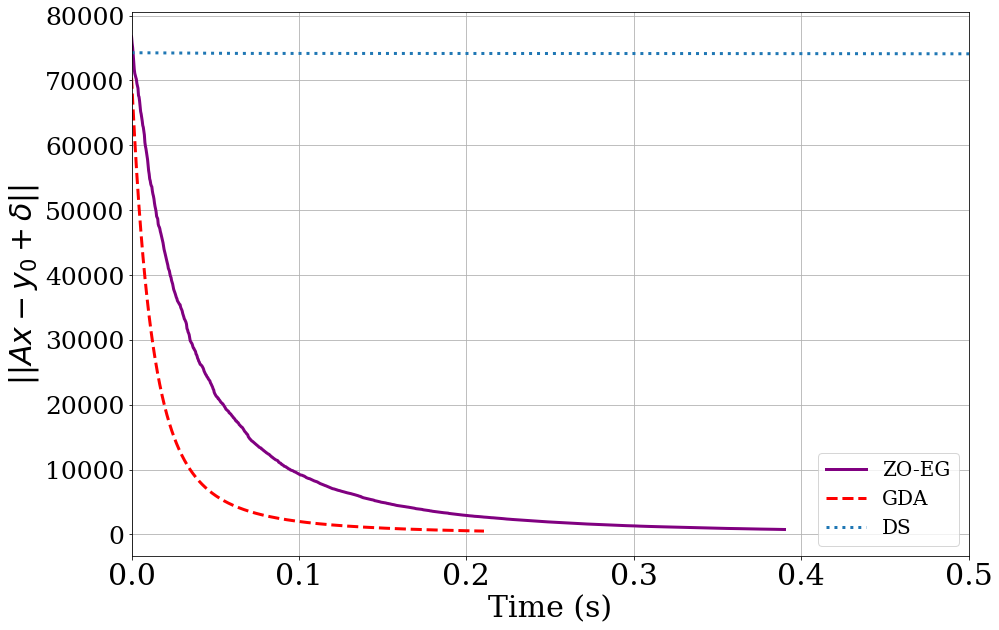

In [53]:
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.figure(figsize=(15,10))

plt.xticks(fontname='serif', fontsize=30, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')

min_length1 = min(len(item) for item in fvalues)
fvalues_avg = np.mean(np.array([item[:min_length1] for item in fvalues]), axis=0)
time_points1 = np.linspace(0, etime_avg, min_length1)

min_length2 = min(len(item) for item in fvalues2)
fvalues2_avg = np.mean(np.array([item[:min_length2] for item in fvalues2]), axis=0)
time_points2 = np.linspace(0, etime_avg2, min_length2)

min_length3 = min(len(item) for item in fvalues3)
fvalues3_avg = np.mean(np.array([item[:min_length3] for item in fvalues3]), axis=0)
time_points3 = np.linspace(0, etime_avg3, min_length3)

plt.plot(time_points1, fvalues_avg, '-',label='ZO-EG', color = 'purple',linewidth=3)
plt.plot(time_points2, fvalues2_avg,'--', label='GDA',color = 'red',linewidth=3)
plt.plot(time_points3, fvalues3_avg,':', label='DS',linewidth=3)


plt.grid('on')
plt.xlabel('Time (s)',fontdict=font)
plt.ylabel('$\||Ax-y_0+\delta\||$',fontdict=font)
plt.legend(loc='best', prop=font1)
plt.xlim(0,0.5)
plt.savefig('Pics/RLS2.pdf', format='pdf',bbox_inches='tight')



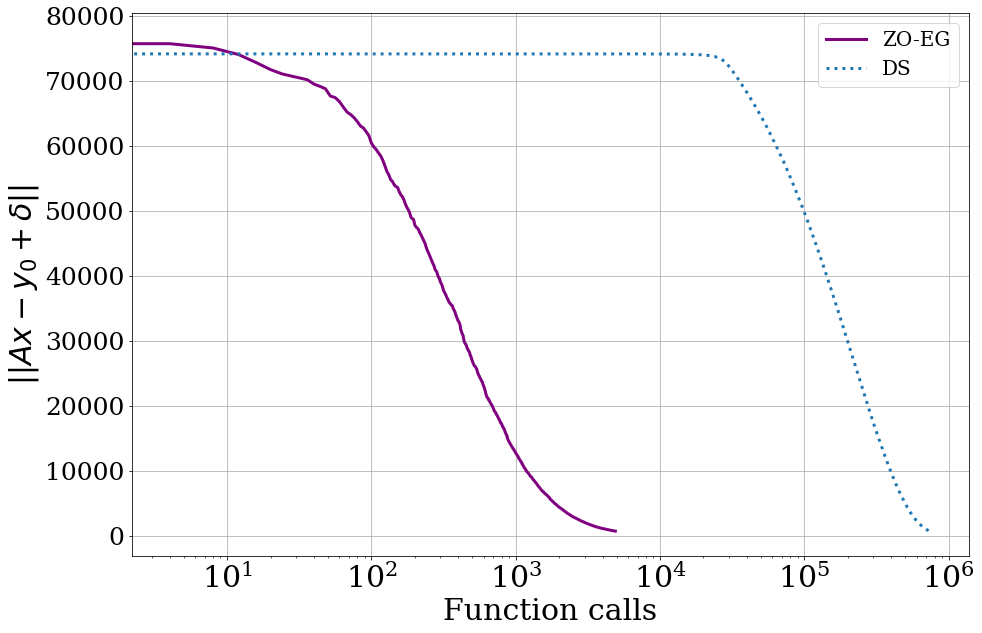

In [59]:
min_length1 = min(len(item) for item in fvalues)
fvalues_avg = np.mean(np.array([item[:min_length1] for item in fvalues]),axis=0)
min_length = min(len(item) for item in fvalues3)
fvalues3_avg = np.mean(np.array([item[:min_length] for item in fvalues3]),axis=0)
f_callstotal_RLS_avg = np.cumsum(np.mean(np.array([item[:min_length] for item in f_callstotal_RLS]),axis=0).T.squeeze())
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.figure(figsize=(15,10))

plt.xticks(fontname='serif', fontsize=30, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')
plt.plot(np.arange(0, 4*len(fvalues_avg), 4), fvalues_avg, '-',label='ZO-EG', color = 'purple',linewidth=3)
plt.plot(f_callstotal_RLS_avg, fvalues3_avg,':', label='DS',linewidth=3)
# plt.xlim(0,min_length1)
# plt.ylim(0)
plt.grid('on')
plt.xlabel('Function calls',fontdict=font)
plt.ylabel('$\||Ax-y_0+\delta\||$',fontdict=font)
plt.legend(loc='best', prop=font1)
plt.xscale('log')
plt.savefig('Pics/RLS3.pdf', format='pdf',bbox_inches='tight')

Below is the code for poisoning attack problem. The code for RMM is here and the code for DS problem is in DR_Low.ipynb file and the results of that code is loaded here.

In [60]:
def euclidean_projectionx(x, max_norm=10):
    return np.clip(x, -max_norm, max_norm)

def euclidean_projectiony(point):
    return(point)

In [77]:
def calculate_accuracy(T, T_new):
    num_correct = np.sum(T == T_new)
    accuracy = num_correct / len(T)
    return accuracy
# Define the logistic function
def logistic_function(z, theta):
    return 1 / (1 + np.exp(-np.dot(z, theta)))

# Define the loss function for training set D_train
def h(x, theta, D):
    loss = 0
    for z, t in D:
        h_x = logistic_function(z + x, theta)
        #epsilon = 1e-8
        #h_x = np.clip(h_x, epsilon, 1 - epsilon)
        loss += t * np.log(h_x) + (1 - t) * np.log(1 - h_x)
    return -loss / len(D)

def objective(x, theta):
    F_tr = h(x, theta, D_train_1) + h(np.zeros(n), theta, D_train_2) + 0.001* np.linalg.norm(theta, 2) ** 2
    return -F_tr
    
T0 = 12000
acc_k = np.zeros((T0+1,20))
ptime = np.zeros(20)
for j in range(20):
    # Generate the dataset
    k = 500
    n = 20
    poisoning_ratio = 0.15
    v = np.random.normal(loc=0, scale=1e-3, size=k)
    Z = np.random.multivariate_normal(mean=np.zeros(n), cov=np.eye(n), size=k)
    Theta_ast = np.random.normal(size=n)
    T = np.where(1 / (1 + np.exp(-(np.dot(Z, Theta_ast) + v))) >= 0.5, 1, 0)

    # Split the dataset into training and testing sets
    D_train = list(zip(Z[:int(k*0.7)], T[:int(k*0.7)]))
    poisoning_size = int(len(D_train) * poisoning_ratio)
    D_train_1 = D_train[:poisoning_size]
    D_train_2 = D_train[poisoning_size:]
    D_test = list(zip(Z[int(k*0.7):], T[int(k*0.7):]))

    x_init = np.zeros(n)*0.1
    theta_init = Theta_ast
    eps = 0.01
    xt = np.zeros(n)
    yt = np.zeros(n)
    start = time.time()
    xt,yt = ZOEG(objective,x_init,theta_init,T0,h_1= 1e-3,h_2=1e-3,mu=0.01, flag2='c', projx=euclidean_projectionx,projy=euclidean_projectiony)
    end = time.time()
    ptime[j] = end - start
    # Calculate the accuracy
    accuracy3 =  np.zeros(np.shape(yt)[1])
    for i in range (np.shape(yt)[1]):
        T_new = np.where(1 / (1 + np.exp(-(np.dot(Z[int(k*0.7):], yt[:,i]) + v[int(k*0.7):]))) >= 0.5, 1, 0)
        accuracy3[i] = calculate_accuracy(T[int(k*0.7):], T_new)
    acc_k[:,j] = accuracy3


ptime_avg = np.mean(ptime)

In [81]:
np.save('acc_krmm.npy', acc_k)
np.save('ptime_avg.npy', ptime_avg)

Loading the saved numpy arrays and plotting them.

/tmp/ipykernel_796924/1638403701.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,len(acc_RMM))


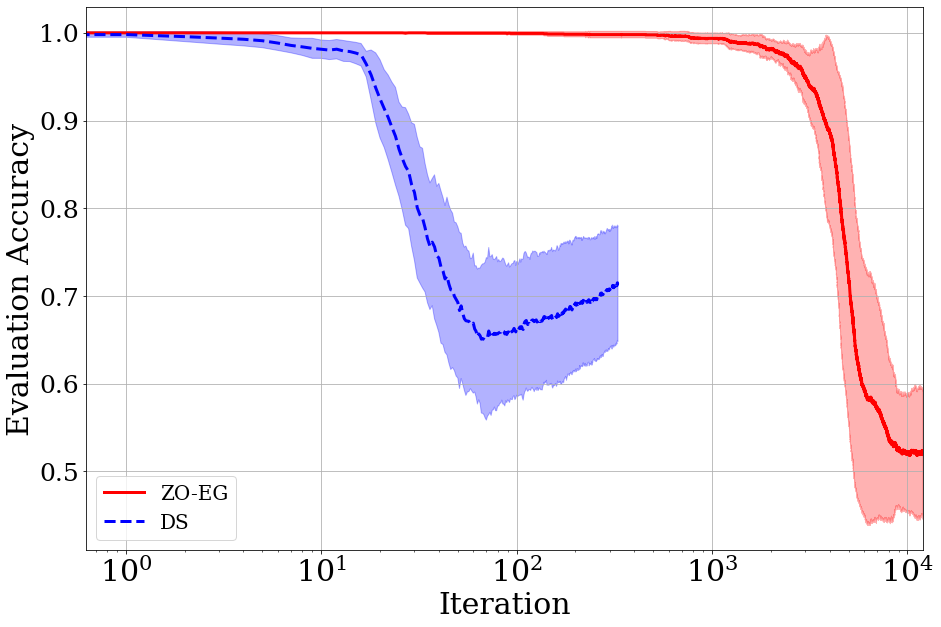

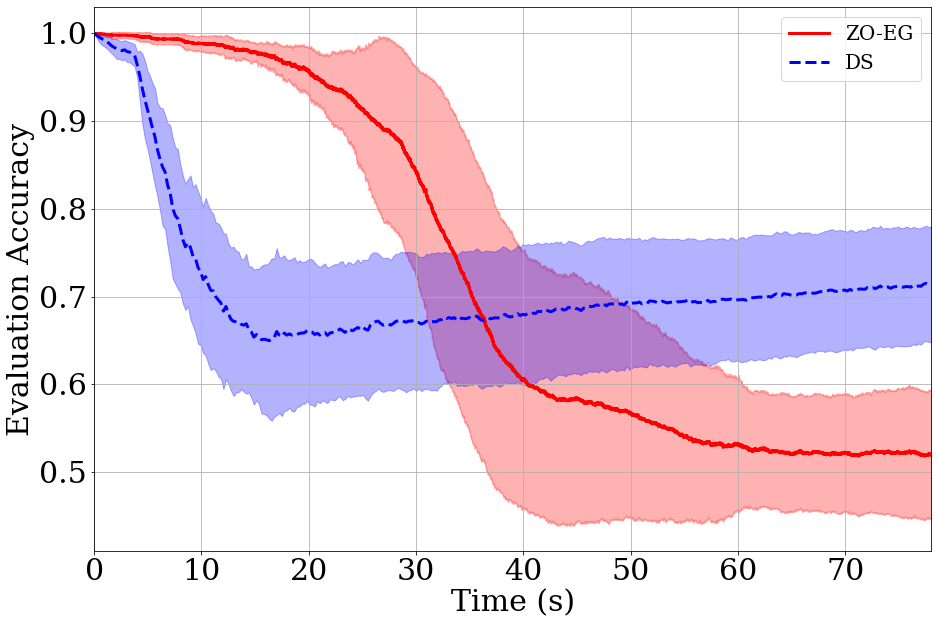

In [15]:
acc_krmm = np.load('acc_krmm.npy')
ptime_avg = np.load('ptime_avg.npy')
acc_kdr = np.load('acc_kdr.npy')
ptime_avg2 = np.load('ptime_avg2.npy')

acc_RMM = np.mean(acc_krmm, axis=1)
std_dev_RMM = np.std(acc_krmm, axis=1)
acc3_DR = np.mean(acc_kdr, axis=1)
std_dev_DR = np.std(acc_kdr, axis=1)
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.figure(figsize=(15,10))
plt.xticks(fontname='serif', fontsize=30, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')
t = np.array(range(len(acc_RMM)))
t1 = np.array(range(len(acc3_DR)))
plt.plot(t,acc_RMM,'-',label='ZO-EG',linewidth=3,color= 'red')
plt.fill_between(t,
                 acc_RMM - std_dev_RMM,
                 acc_RMM + std_dev_RMM,
                 alpha=0.3,color='red')
plt.plot(t1,acc3_DR,'--',label='DS',linewidth=3, color='blue')
plt.fill_between(t1,
                 acc3_DR - std_dev_DR,
                 acc3_DR + std_dev_DR,
                 alpha=0.3,color='blue')
plt.legend(loc='best', prop=font1)
plt.ylabel('Evaluation Accuracy',fontdict=font)
plt.xlabel('Iteration',fontdict=font)
plt.grid('on')
plt.xscale('log')
plt.xlim(0,len(acc_RMM))

plt.savefig('Pics/poison_acc.pdf', format='pdf',bbox_inches='tight')


plt.figure(figsize=(15,10))
plt.xticks(fontname='serif', fontsize=30, color='black')
plt.yticks(fontname='serif', fontsize=30, color='black')
t = np.linspace(0,int(ptime_avg),len(acc_RMM))
t1 = np.linspace(0,int(ptime_avg2),len(acc3_DR))
plt.plot(t,acc_RMM,'-',label='ZO-EG',linewidth=3,color= 'red')
plt.fill_between(t,
                 acc_RMM - std_dev_RMM,
                 acc_RMM + std_dev_RMM,
                 alpha=0.3,color='red')
plt.plot(t1,acc3_DR,'--',label='DS',linewidth=3, color='blue')
plt.fill_between(t1,
                 acc3_DR - std_dev_DR,
                 acc3_DR + std_dev_DR,
                 alpha=0.3,color='blue')
plt.xlim(0,int(ptime_avg2))
plt.grid('on')
plt.legend(loc='best', prop=font1)
plt.ylabel('Evaluation Accuracy',fontdict=font)
plt.xlabel('Time (s)',fontdict=font)
plt.savefig('Pics/poison_acc_time.pdf', format='pdf',bbox_inches='tight')

In [32]:
print(ptime_avg/len(acc_RMM),ptime_avg2/len(acc3_DR))

0.006933381461906449 0.23709512304323319


/tmp/ipykernel_796924/2991090642.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,f_callstotal_avg[-1])


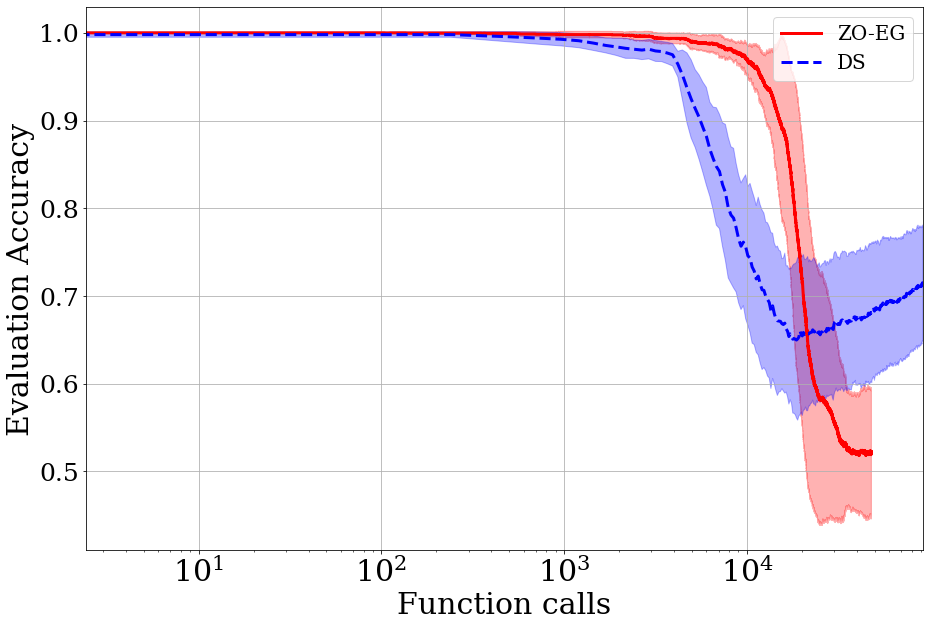

In [37]:
acc_krmm = np.load('acc_krmm.npy')
ptime_avg = np.load('ptime_avg.npy')
acc_kdr = np.load('acc_kdr.npy')
ptime_avg2 = np.load('ptime_avg2.npy')
f_callstotal = np.load('f_callstotal.npy')
f_callstotal_avg = np.cumsum(np.mean(f_callstotal,axis=0).T.squeeze())
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.figure(figsize=(15,10))
plt.xticks(fontname='serif', fontsize=30, color='black')
plt.yticks(fontname='serif', fontsize=25, color='black')
t = np.arange(0, 4*len(acc_RMM), 4)
plt.plot(t,acc_RMM,'-',label='ZO-EG',linewidth=3,color= 'red')
plt.fill_between(t,
                 acc_RMM - std_dev_RMM,
                 acc_RMM + std_dev_RMM,
                 alpha=0.3,color='red')
plt.plot(f_callstotal_avg,acc3_DR,'--',label='DS',linewidth=3, color='blue')
plt.fill_between(f_callstotal_avg,
                 acc3_DR - std_dev_DR,
                 acc3_DR + std_dev_DR,
                 alpha=0.3,color='blue')
plt.legend(loc='best', prop=font1)
plt.ylabel('Evaluation Accuracy',fontdict=font)
plt.xlabel('Function calls',fontdict=font)
plt.grid('on')
plt.xscale('log')
plt.xlim(0,f_callstotal_avg[-1])

plt.savefig('Pics/poison_acc_fcall.pdf', format='pdf',bbox_inches='tight')